# Titanic파일로 하는 데이터 전처리

## titanic파일 불러오기

In [347]:
import pandas as pd
titanic_df = pd.read_csv('C:/apps/ml/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [348]:
titanic=titanic_df
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [269]:
print('\n ###학습 데이터 정보### \n')
print(titanic_df.info())


 ###학습 데이터 정보### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 불필요한 컬럼 제거

In [350]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin'],axis=1,inplace=True)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [273]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


## 결측치 제거 및 확인

In [351]:
titanic['Age'].isnull().sum()

177

In [352]:
titanic['Age']  = train['Age'].fillna(train['Age'].mean())
titanic['Embarked'] = train['Embarked'].fillna('S')
titanic['Embarked'].isnull().sum()

0

In [353]:
titanic.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

## 데이터 인코딩

### One-hot encoder이용(Sex,Embarked)

#### labe encoder로 변경 먼저! 

In [354]:
# 문자열 포함된 'Sex','Embarked' 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

#어떤 DataFrame의 column인지를 반드시 나타내 줘야 함
encoder = LabelEncoder()
titanic['Sex'] = encoder.fit_transform(titanic['Age'])
titanic['Embarked'] = encoder.fit_transform(titanic['Embarked'])


#변경값 확인
titanic.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,28,22.0,2
1,1,1,52,38.0,0
2,1,3,34,26.0,2
3,1,1,48,35.0,2
4,0,3,48,35.0,2


## 파일 합치기(일단 생략) 

In [292]:
dummy_df = pd.concat([train,df],axis=1)

In [293]:
dummy_df

,Survived,Pclass,Sex,Age,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.000000,S,0,1,0,0,1
1,1,1,female,38.000000,C,1,0,1,0,0
2,1,3,female,26.000000,S,1,0,0,0,1
3,1,1,female,35.000000,S,1,0,0,0,1
4,0,3,male,35.000000,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0,1,0,0,1
887,1,1,female,19.000000,S,1,0,0,0,1
888,0,3,female,29.699118,S,1,0,0,0,1
889,1,1,male,26.000000,C,0,1,1,0,0


In [294]:
dummy_df.drop(columns=['Sex','Embarked'],inplace=True)

In [295]:
# 데이터프레임형태로 변환
dummy_df

,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,0,1,0,0,1
1,1,1,38.000000,1,0,1,0,0
2,1,3,26.000000,1,0,0,0,1
3,1,1,35.000000,1,0,0,0,1
4,0,3,35.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,1,0,0,1
887,1,1,19.000000,1,0,0,0,1
888,0,3,29.699118,1,0,0,0,1
889,1,1,26.000000,0,1,1,0,0


In [296]:
dummy_df.dtypes

Survived        int64
Pclass          int64
Age           float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

## fit&transform으로 호출( 스케일링)(생략)

In [297]:
dummy_df

,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,0,1,0,0,1
1,1,1,38.000000,1,0,1,0,0
2,1,3,26.000000,1,0,0,0,1
3,1,1,35.000000,1,0,0,0,1
4,0,3,35.000000,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,1,0,0,1
887,1,1,19.000000,1,0,0,0,1
888,0,3,29.699118,1,0,0,0,1
889,1,1,26.000000,0,1,1,0,0


In [298]:
from sklearn.preprocessing import RobustScaler

In [299]:
scaler.fit(dummy_df)
dummy_scaled = scaler.transform(dummy_df)

In [300]:
dummy_scaled

array([[ 0.        ,  0.        , -0.59223982, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.        ,  0.63852941, ...,  1.        ,
         0.        , -1.        ],
       [ 1.        ,  0.        , -0.28454751, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -2.        , -0.28454751, ...,  1.        ,
         0.        , -1.        ],
       [ 0.        ,  0.        ,  0.17699095, ...,  0.        ,
         1.        , -1.        ]])

## Scaled된 data를 다시 dataframe형태로 변환(생략)

In [306]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [309]:
dummy_df_scaled = pd.DataFrame(data=dummy_scaled, columns=dummy_df.columns)
dummy_df_scaled 

,Survived,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,-0.592240,0.0,0.0,0.0,0.0,0.0
1,1.0,-2.0,0.638529,1.0,-1.0,1.0,0.0,-1.0
2,1.0,0.0,-0.284548,1.0,-1.0,0.0,0.0,0.0
3,1.0,-2.0,0.407760,1.0,-1.0,0.0,0.0,0.0
4,0.0,0.0,0.407760,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
886,0.0,-1.0,-0.207624,0.0,0.0,0.0,0.0,0.0
887,1.0,-2.0,-0.823009,1.0,-1.0,0.0,0.0,0.0
888,0.0,0.0,0.000000,1.0,-1.0,0.0,0.0,0.0
889,1.0,-2.0,-0.284548,0.0,0.0,1.0,0.0,-1.0


## Robust Scaling

In [328]:
titanic_df = titanic

### Robust Scaling후 다시 DataFrame으로 변경

In [355]:
from sklearn.preprocessing import RobustScaler
rbscaler = RobustScaler()

# train_df 데이터를 robust scaler해줌

titanic_scaled = rbscaler.fit_transform(titanic)

# robust scaler한 값을 다시 DataFrame형태로 변환 
titanic_df_scaled = pd.DataFrame(data=titanic_scaled, columns =titanic.columns)

In [356]:
titanic_df_scaled

,Survived,Pclass,Sex,Age,Embarked
0,0.0,0.0,-0.55,-0.592240,0.0
1,1.0,-2.0,0.65,0.638529,-2.0
2,1.0,0.0,-0.25,-0.284548,0.0
3,1.0,-2.0,0.45,0.407760,0.0
4,0.0,0.0,0.45,0.407760,0.0
...,...,...,...,...,...
886,0.0,-1.0,-0.20,-0.207624,0.0
887,1.0,-2.0,-0.75,-0.823009,0.0
888,0.0,0.0,0.00,0.000000,0.0
889,1.0,-2.0,-0.25,-0.284548,-2.0


In [357]:
import matplotlib.pyplot as plt
import seaborn as sns

q3,q1 = np.percentile(train_df_scaled, [75,25])
iqr = q3 - q1


print('feature들의 중간 값')
print(titanic_df_scaled.median())
print('\nfeature 들의 사분위 값')
print(iqr)

print('\nfeature들의 평균 값')
print(titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(titanic_df_scaled.var())

feature들의 중간 값
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Embarked    0.0
dtype: float64

feature 들의 사분위 값
0.5153167420814477

feature들의 평균 값
Survived    3.838384e-01
Pclass     -6.913580e-01
Sex         1.228956e-02
Age         2.153160e-16
Embarked   -4.635241e-01
dtype: float64

feature 들의 분산 값
Survived    0.236772
Pclass      0.699015
Sex         0.698037
Age         1.000310
Embarked    0.626477
dtype: float64


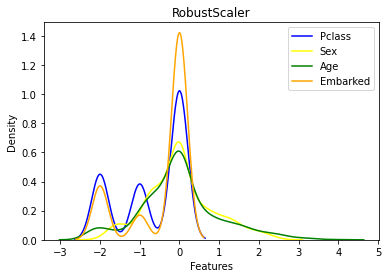

In [346]:
fig = plt.plot(figsize =(20,5))

sns.kdeplot(train_df_scaled['Pclass'], color='blue')
sns.kdeplot(train_df_scaled['Sex'], color='yellow')
sns.kdeplot(train_df_scaled['Age'], color='green')
sns.kdeplot(train_df_scaled['Embarked'], color='orange')

plt.title('RobustScaler')
plt.xlabel('Features')
plt.legend(['Pclass', 'Sex', 'Age', 'Embarked'])

plt.show()

## Standard Scaling

feature들의 평균 값
Survived    3.987333e-17
Pclass     -8.772133e-17
Sex         3.987333e-17
Age         2.232906e-16
Embarked   -4.984166e-17
dtype: float64

feature 들의 분산 값
Survived    1.001124
Pclass      1.001124
Sex         1.001124
Age         1.001124
Embarked    1.001124
dtype: float64


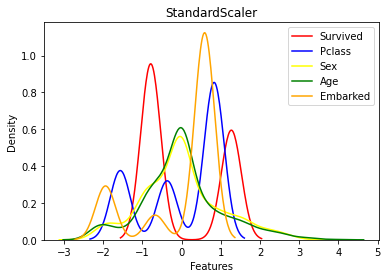

In [358]:
sscaler = StandardScaler()

titanic_scaled = sscaler.fit_transform(titanic)

titanic_df_scaled = pd.DataFrame(data= titanic_scaled, columns=titanic.columns)

print('feature들의 평균 값')
print(titanic_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(titanic_df_scaled.var())

fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic_df_scaled['Survived'], color='red')
sns.kdeplot(titanic_df_scaled['Pclass'], color='blue')
sns.kdeplot(titanic_df_scaled['Sex'], color='yellow')
sns.kdeplot(titanic_df_scaled['Age'], color='green')
sns.kdeplot(titanic_df_scaled['Embarked'], color='orange')

plt.title('StandardScaler')

plt.xlabel('Features')
plt.legend(['Survived','Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()

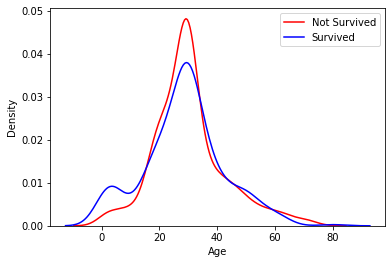

In [359]:
fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic['Age'][(titanic['Survived'] == 0)], color='red')
sns.kdeplot(titanic['Age'][(titanic['Survived'] == 1)], color='blue')
plt.xlabel('Age')
plt.legend(['Not Survived', 'Survived'])
plt.show()

## MinMax Scaler

feature들의 최소 값
Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Embarked    0.0
dtype: float64

feature 들의 최대 값
Survived    1.0
Pclass      1.0
Sex         1.0
Age         1.0
Embarked    1.0
dtype: float64


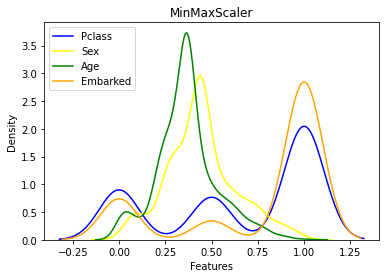

In [360]:
mmcaler = MinMaxScaler()

titanic_scaled = mmcaler.fit_transform(titanic)

titanic_df_scaled = pd.DataFrame(data= titanic_scaled, columns=titanic.columns)

print('feature들의 최소 값')
print(titanic_df_scaled.min())
print('\nfeature 들의 최대 값')
print(titanic_df_scaled.max())

fig = plt.plot(figsize=(20,5))

sns.kdeplot(titanic_df_scaled['Pclass'], color='blue')
sns.kdeplot(titanic_df_scaled['Sex'], color='yellow')
sns.kdeplot(titanic_df_scaled['Age'], color='green')
sns.kdeplot(titanic_df_scaled['Embarked'], color='orange')

plt.title('MinMaxScaler')
plt.xlabel('Features')
plt.legend(['Pclass', 'Sex', 'Age', 'Embarked'])
plt.show()